In this notebook we demonstrate how pretraining models in an unsupervised manner can improve the label efficiency of a downstream task, in this case the EuroSAT classification task.

In [1]:
experiments = [
    'scratch',
    'imagenet-ft',
    'imagenet-tl',
    'ssl-ft',
    'ssl-tl'
]

label_ratios = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
# label_ratios = [0.01, 0.05]

logs_dir = 'logs'

In [2]:
import pandas as pd
import os

data = {}
for name in experiments:
    data[name] = {}
    for label_ratio in label_ratios:
        try:
            dir = f"{logs_dir}/{name}-{label_ratio}"
            versions = sorted(os.listdir(dir))
            latest_version = versions[-1]
            metrics = pd.read_csv(f"{dir}/{latest_version}/metrics.csv")
            last_val_acc = metrics.iloc[-1]['val_acc']
        except Exception as e:
            print(f"Error reading metrics for {name}-{label_ratio}: {e}")
            last_val_acc = 0.0
        data[name][label_ratio] = last_val_acc

# Create DataFrame with proper index
benchmark = pd.DataFrame(data)

benchmark

,scratch,imagenet-ft,imagenet-tl,ssl-ft,ssl-tl
0.01,0.115741,0.698333,0.352037,0.768889,0.586852
0.02,0.400370,0.823519,0.451111,0.804815,0.649074
0.05,0.569074,0.872407,0.475000,0.864444,0.718889
0.10,0.611481,0.898704,0.535370,0.884815,0.760370
0.20,0.645926,0.934815,0.627222,0.906852,0.785185
0.50,0.734630,0.954815,0.716667,0.925000,0.814630
1.00,0.833704,0.946481,0.745926,0.931852,0.833889


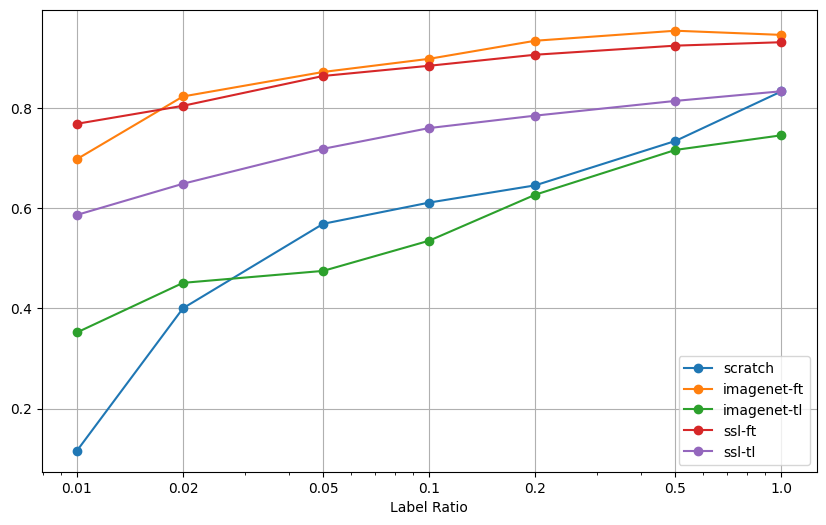

In [ ]:
import matplotlib.pyplot as plt

benchmark.plot(kind='line', figsize=(10, 6), marker='o', grid=True)
plt.xscale('log')
plt.xlabel('Label Ratio')
plt.xticks(label_ratios, label_ratios)  
plt.show()
